In [1]:
#Importing essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import LabelEncoder, minmax_scale
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, RandomizedSearchCV 
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from mlxtend.regressor import StackingCVRegressor
from sklearn.metrics import r2_score,mean_squared_error
from tabulate import tabulate
import warnings
warnings.filterwarnings("ignore")

In [70]:
#Load the train Dataset
benz_data = pd.read_csv("train.csv")

### Data Exploration and Preprocessing:

In [3]:
benz_data.head()

,ID,y,X0,X1,X2,X3,X4,X5,X6,X8,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,130.81,k,v,at,a,d,u,j,o,...,0,0,1,0,0,0,0,0,0,0
1,6,88.53,k,t,av,e,d,y,l,o,...,1,0,0,0,0,0,0,0,0,0
2,7,76.26,az,w,n,c,d,x,j,x,...,0,0,0,0,0,0,1,0,0,0
3,9,80.62,az,t,n,f,d,x,l,e,...,0,0,0,0,0,0,0,0,0,0
4,13,78.02,az,v,n,f,d,h,d,n,...,0,0,0,0,0,0,0,0,0,0


In [4]:
#Size of the dataset
benz_data.shape

(4209, 378)

In [5]:
#Get the information about rows and columns in Data
benz_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4209 entries, 0 to 4208
Columns: 378 entries, ID to X385
dtypes: float64(1), int64(369), object(8)
memory usage: 12.1+ MB


Dataset contains 1 column-float64, 369 columns-int64, 8 columns-object

In [6]:
#Statistical Summary of Numeric Variables
benz_data.describe() 

,ID,y,X10,X11,X12,X13,X14,X15,X16,X17,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
count,4209.000000,4209.000000,4209.000000,4209.0,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,...,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000,4209.000000
mean,4205.960798,100.669318,0.013305,0.0,0.075077,0.057971,0.428130,0.000475,0.002613,0.007603,...,0.318841,0.057258,0.314802,0.020670,0.009503,0.008078,0.007603,0.001663,0.000475,0.001426
std,2437.608688,12.679381,0.114590,0.0,0.263547,0.233716,0.494867,0.021796,0.051061,0.086872,...,0.466082,0.232363,0.464492,0.142294,0.097033,0.089524,0.086872,0.040752,0.021796,0.037734
min,0.000000,72.110000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2095.000000,90.820000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4220.000000,99.150000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6314.000000,109.010000,0.000000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,8417.000000,265.320000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
#Check for null values
print("Total unique number(s) of nullcount: ",benz_data.isna().sum().unique())

Total unique number(s) of nullcount:  [0]


There are no null values in benz_data

In [8]:
#Selecting only numerical columns
num_col = benz_data.select_dtypes(np.number)
#drop the id and target column
num_col = num_col.drop(['ID','y'],axis=1)
num_col.head()

,X10,X11,X12,X13,X14,X15,X16,X17,X18,X19,...,X375,X376,X377,X378,X379,X380,X382,X383,X384,X385
0,0,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
#Checkfor unique values present in numerical columns
np.unique(num_col.values)

array([0, 1], dtype=int64)

we can see that numerical columns in dataset is having binary values(0 or 1)

In [10]:
print("There are {} numerical columns present in independent features".format(len(num_col.columns)))

There are 368 numerical columns present in independent features


* Remove the columns which have zero variance

In [11]:
#Instantiate variance_threshold with 0 variance
var_thr = VarianceThreshold(threshold=0)

In [12]:
#fit the variance_threshold to numerical columns to check for zero variance
var_thr = var_thr.fit(num_col)

In [13]:
#get the list zero variance columns in numerical columns
zero_var_col = [col for col in num_col.columns if col not in num_col.columns[var_thr.get_support()]]
print(zero_var_col)
print('{} zero vaiance columns present in numerical columns.'.format(len(zero_var_col)))

['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
12 zero vaiance columns present in numerical columns.


In [14]:
#Dropping 0 variance columns in num_col
num_col = num_col.drop(columns=zero_var_col,axis=1)

In [15]:
num_col.shape

(4209, 356)

* Remove the columns which have same variance 

In [16]:
#Creating the dataframe by using variance of each columns in num_col
vari_col = pd.DataFrame(num_col.var(),columns=['Variance'])
vari_col.head()

,Variance
X10,0.013131
X12,0.069457
X13,0.054623
X14,0.244893
X15,0.000475


In [17]:
vari_col.shape

(356, 1)

In [18]:
#Get Dublicated values present in variance columns
dublicate_var = vari_col[vari_col.duplicated()]
print('{} same variance of columns present in numerical columns'.format(len(dublicate_var)))

56 same variance of columns present in numerical columns


In [19]:
#Drop the Zero variance and same variance columns present in main data
benz_data = benz_data.drop(zero_var_col,axis=1)
benz_data = benz_data.drop(dublicate_var.index,axis=1)

In [20]:
print('The shape of dataset after droping Zero variance and same variance columns in benz_dataset is :',benz_data.shape)

The shape of dataset after droping Zero variance and same variance columns in benz_dataset is : (4209, 310)


* Analysis of Target Variable (‘y’)

<AxesSubplot:xlabel='y', ylabel='Density'>

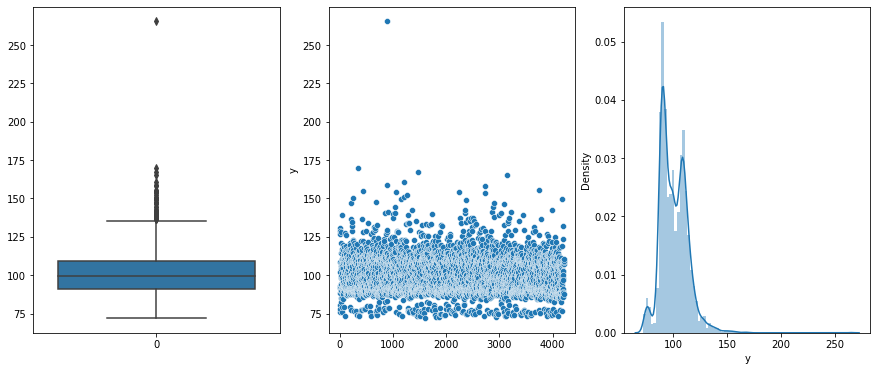

In [21]:
#Plot for target variable
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sns.boxplot(data=benz_data["y"])
plt.subplot(1,3,2)
sns.scatterplot(data=benz_data["y"])
plt.subplot(1,3,3)
sns.distplot(benz_data["y"],bins=80)

We can see Outliers present in target variable

* Handling the outliers

In [22]:
#Creating a Function which remove the outliers in dataset
def remove_outlier_IQR(df):
    global Q1,Q3,IQR
    Q1=df.y.quantile(0.25)
    Q3=df.y.quantile(0.75)
    IQR=Q3-Q1
    data = df.query("(@Q1 -(1.5*@IQR) <= @df.y <= (@Q3+1.5*@IQR))")
    return data

In [23]:
#now will apply the outlier function to the benz_dataset
benz_data =remove_outlier_IQR(benz_data)
print("Most of the target data is distributed in range of {:.0f} to {:.0f}.".format(Q1-(1.5*IQR),Q3 + (1.5*IQR)))
print("After appling the outlier funtion to the benz_dataset, The shape of dataset is",benz_data.shape)

Most of the target data is distributed in range of 64 to 136.
After appling the outlier funtion to the benz_dataset, The shape of dataset is (4159, 310)


* Analysis of Categorical Variable (‘y’)

In [24]:
#Check for Categorical variables
benz_data.select_dtypes(object).head()

,X0,X1,X2,X3,X4,X5,X6,X8
0,k,v,at,a,d,u,j,o
1,k,t,av,e,d,y,l,o
2,az,w,n,c,d,x,j,x
3,az,t,n,f,d,x,l,e
4,az,v,n,f,d,h,d,n


There are 8 categorical features in dataset.

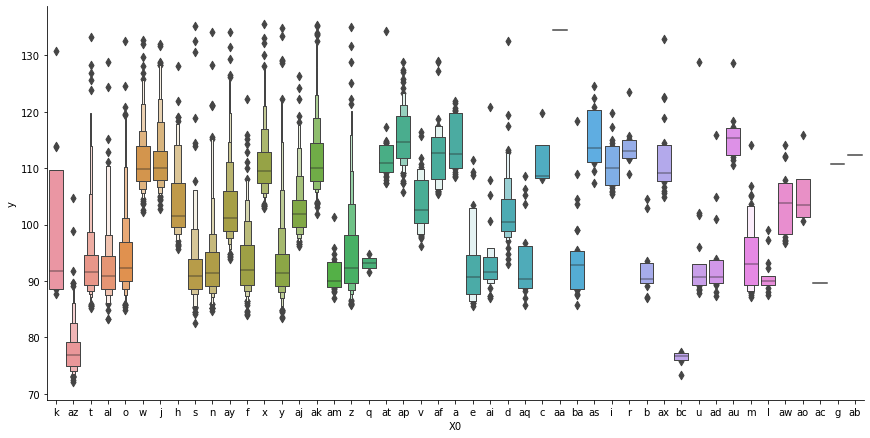

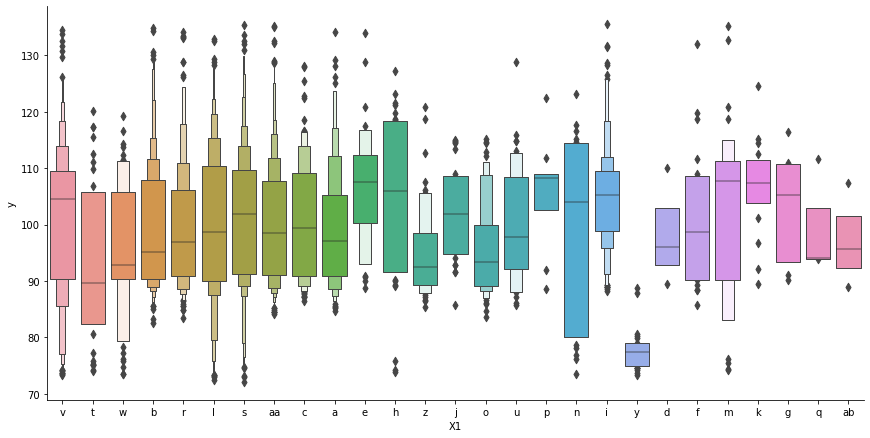

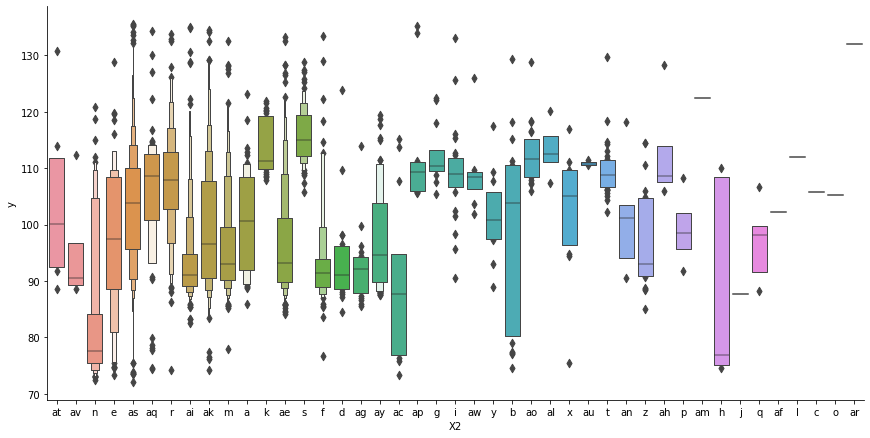

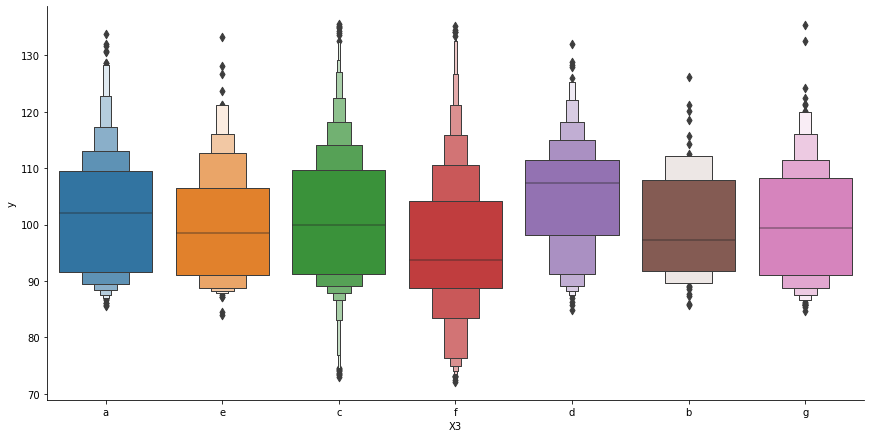

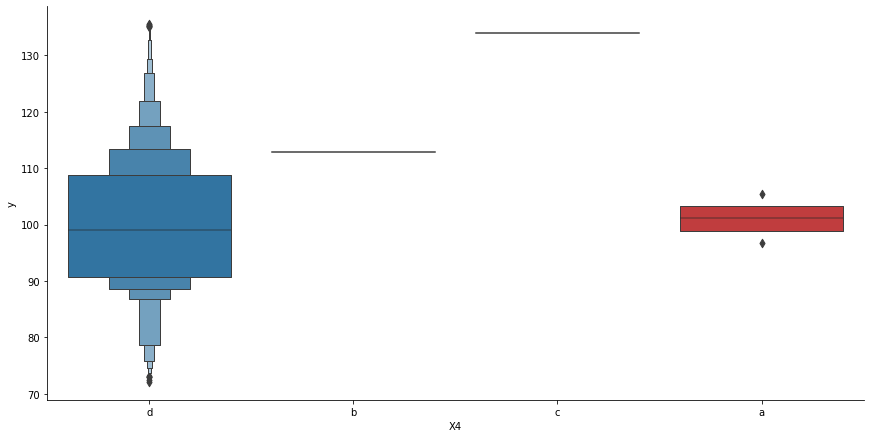

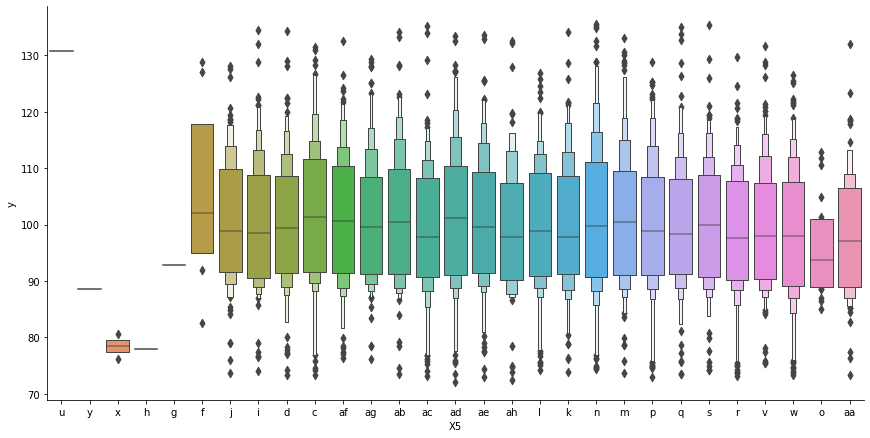

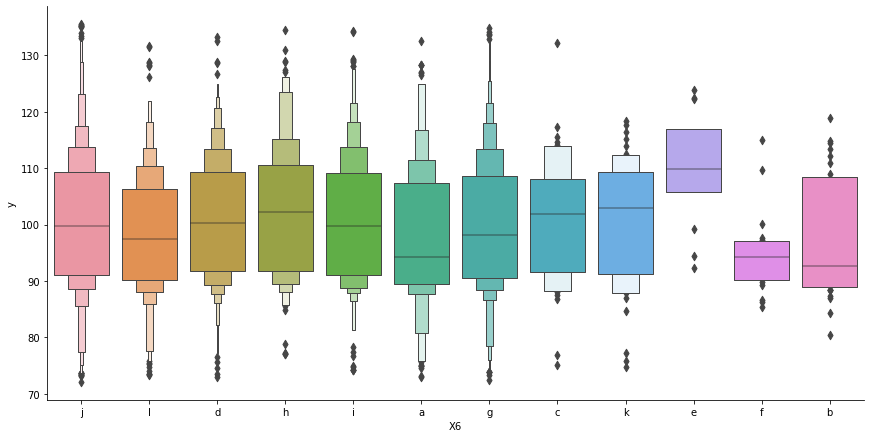

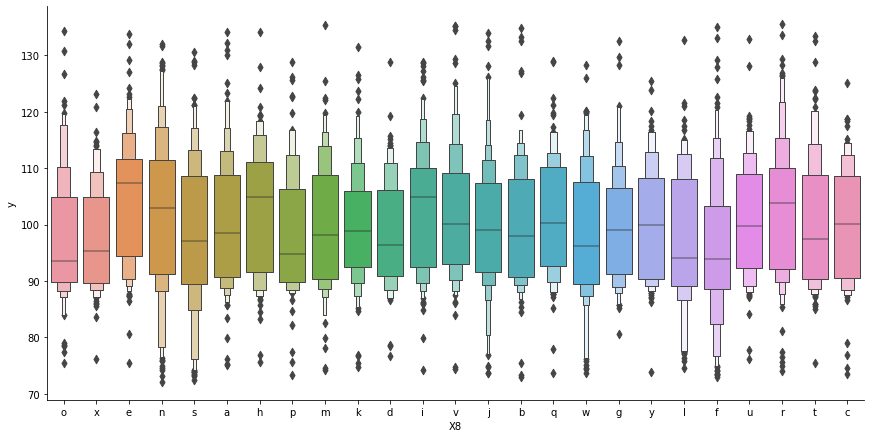

In [25]:
#plot Categorical variables by using target vaiable
x=2
for i in range(8):
    sns.catplot(y = 'y', x = benz_data.iloc[:,x], data = benz_data.sort_values("y", ascending = False),
                kind="boxen", height = 6, aspect = 2)
    plt.show()
    x=x+1

As we see in above Catplots:     
1.Categorical features X0 & X5 are highly important in the prediction of our model.    
2.The variable X4 has no much variance in data. That means its not much use full to predict the target variable, So we will    drop the X4 variable

In [26]:
#Drop the less variance categoical variable X4 in main data
benz_data = benz_data.drop('X4',axis=1)

In [27]:
benz_data.shape

(4159, 309)

In [28]:
#Extracting Independendent(X) and dependent(Y) variable(s) from mbrd_data
X_data = benz_data.drop(["ID","y"],axis=1)
y_data = benz_data["y"]

In [29]:
X_data.shape, y_data.shape 

((4159, 307), (4159,))

* Feature Transformation

In [30]:
#collecting the categorical variables names in 'label' variable
label = X_data.select_dtypes(object).columns
label

Index(['X0', 'X1', 'X2', 'X3', 'X5', 'X6', 'X8'], dtype='object')

There are total of 7 categorical variables

Use Label Encoder to convert categorical variables into numerical variables

In [31]:
#Instantiate the label encoder method
le = LabelEncoder()

In [32]:
#Applying LabelEncoder to Data
X_data[label] = X_data[label].apply(le.fit_transform)

In [33]:
#Check for Data types
print('Total count diffrent dtypes of X_train: ',X_data.dtypes.value_counts())

Total count diffrent dtypes of X_train:  int64    300
int32      7
dtype: int64


* Feature Scaling

In [34]:
#Fit the data to min_max scaler
X_data_scaled = pd.DataFrame(minmax_scale(X_data))

In [35]:
X_data_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,297,298,299,300,301,302,303,304,305,306
0,0.695652,0.884615,0.380952,0.000000,0.857143,0.818182,0.583333,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.695652,0.807692,0.428571,0.666667,1.000000,1.000000,0.583333,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.434783,0.923077,0.785714,0.333333,0.964286,0.818182,0.958333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.434783,0.807692,0.785714,0.833333,0.964286,1.000000,0.166667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.434783,0.884615,0.785714,0.833333,0.428571,0.272727,0.541667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


* Feature Selection

Applying principal component analysis to reduce the dimensionality/columns of dataset to over come with curse of dimensionality.

In [36]:
#Perform dimensionality reduction
#will select first 40 PCA only 
n_comp = 60
pca = PCA(n_components=n_comp, random_state=420)

#fit the data
X_pca = pca.fit_transform(X_data_scaled)
X_pca.shape

(4159, 60)

In [37]:
pca.explained_variance_ratio_

array([0.12891767, 0.08787392, 0.08360041, 0.06808632, 0.05305408,
       0.04606085, 0.03549961, 0.03405258, 0.02721136, 0.02544081,
       0.02302987, 0.01939744, 0.01741078, 0.01661414, 0.01567583,
       0.01531504, 0.01318428, 0.01217599, 0.01085013, 0.01029305,
       0.00991997, 0.00897765, 0.00879622, 0.00814555, 0.00793545,
       0.00742663, 0.00704462, 0.00633395, 0.00565131, 0.00532674,
       0.00527688, 0.00511454, 0.00481542, 0.00462846, 0.00451136,
       0.00439552, 0.00433311, 0.00429366, 0.00394699, 0.0038513 ,
       0.00374938, 0.00371014, 0.00356887, 0.00341764, 0.00336348,
       0.0031845 , 0.00314067, 0.00303192, 0.00298431, 0.00292621,
       0.00278807, 0.00268868, 0.00261315, 0.00257277, 0.00240255,
       0.00234683, 0.00226556, 0.0022311 , 0.00214208, 0.00209249])

## Model Building

In [38]:
#Split the data into train and test data
X_train,X_test,y_train,y_test = train_test_split(X_pca,y_data,test_size=0.2,random_state=100)
X_train.shape,X_test.shape

((3327, 60), (832, 60))

#### 1. Linear Regression model

In [39]:
# Initialize Linear Regression model
lr_model = LinearRegression(n_jobs=-1)
# fit the training data
lr_model.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [40]:
# Prediction for test data
prd_lr_model = lr_model.predict(X_test)

# summarize result
print('R_2 Score for Test Data {:.4f}'.format(r2_score(y_test,prd_lr_model)))
print('RMSE Score for test Data {:.4f}'.format(np.sqrt(mean_squared_error(y_test,prd_lr_model))))

R_2 Score for Test Data 0.6250
RMSE Score for test Data 7.0418


#### 2. Random Forest Regression model

In [41]:
#define search space for Random Forest Regressor
rand_para = {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [150, 300, 400]}

# Initialize Random Forest Regressor model
rf = RandomForestRegressor()

# define search for RandomizedSearchCV
random_search = RandomizedSearchCV(estimator = rf, param_distributions = rand_para, n_iter = 10, cv = 3, verbose=2,
                               random_state=42, n_jobs = -1)

# execute search
random_search.fit(X_train,y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [150, 300, 400]},
                   random_state=42, verbose=2)

In [42]:
#To kow best parameters Selected by the RandomizedSearchCV for Random forest regressor
random_search.best_params_

{'n_estimators': 300,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [43]:
# define RandomForestRegressor model with selected parameters by RandomizedSearchCV
rand_forest = RandomForestRegressor(n_estimators = 300, min_samples_split = 2, min_samples_leaf= 4, max_features = 'auto',
                                   max_depth=  70, bootstrap =  True)

# Fit the training data
rand_forest.fit(X_train,y_train)

RandomForestRegressor(max_depth=70, min_samples_leaf=4, n_estimators=300)

In [44]:
# Prediction for test data
prd_rand_forest= rand_forest.predict(X_test)

print('R_2 Score for Test Data {:.4f}'.format(r2_score(y_test,prd_rand_forest)))
print('RMSE Score for test Data {:.4f}'.format(np.sqrt(mean_squared_error(y_test,prd_rand_forest))))

R_2 Score for Test Data 0.6005
RMSE Score for test Data 7.2683


#### 3. XGboost Regression model

In [45]:
# define search space
prams={'max_depth':[3,4,5,6],
       'subsample':[0.1,0.3,0.5,1],
       'learning_rate':[0.05,0.02,0.25,0.15,0.2,0.25],
       'n_estimators':[20,40,80,100,150,200],
       'colsample_bytree':[0.1,0.3,0.5,1],
      }

#instantiate Xgb_regression model
xgb_reg = xgb.XGBRegressor()

# define search for RandomizedSearchCV
random_search=RandomizedSearchCV(xgb_reg,param_distributions=prams,n_iter=5,
                                 n_jobs=-1,cv=5,verbose=3)

In [46]:
# execute search
search = random_search.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [47]:
#To kow best parameters Selected by the RandomizedSearchCV for Xgboost model 
random_search.best_params_

{'subsample': 0.3,
 'n_estimators': 100,
 'max_depth': 6,
 'learning_rate': 0.25,
 'colsample_bytree': 0.1}

In [48]:
#Now will define XGBRegressor model with selected parameters by RandomizedSearchCV
xgb_reg = xgb.XGBRegressor(subsample= 0.5,n_estimators= 200,max_depth = 4,learning_rate = 0.05,colsample_bytree = 0.3)

#Fit the training dataset
xgb_reg.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.3, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=200, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [49]:
#Predict for test dataset
preds_xgb_reg = xgb_reg.predict(X_test)

# summarize result
print('R_2 Score for Test Data {:.4f}'.format(r2_score(y_test,preds_xgb_reg)))
print('RMSE Score for test Data {:.4f}'.format(np.sqrt(mean_squared_error(y_test,preds_xgb_reg))))

R_2 Score for Test Data 0.6114
RMSE Score for test Data 7.1681


#### 4. Stacked Regression model

In [50]:
# Initializing base models
model1_lr = LinearRegression(n_jobs=-1)

model2_rand_forest = RandomForestRegressor(n_estimators = 300,min_samples_split =2 ,min_samples_leaf= 4
                                           ,max_features = 'auto', max_depth=  70, bootstrap =  True)

model3_xgb_reg = xgb.XGBRegressor(subsample= 0.5,n_estimators= 200,max_depth = 4,learning_rate = 0.05,
                                  colsample_bytree = 0.3)

# Initializing the Meta model
ridge = Ridge(random_state=42, fit_intercept=False, alpha=0)

In [51]:
# Define the stacking regressor ensemble model
stack_reg = StackingCVRegressor(regressors=(model1_lr ,model2_rand_forest, model3_xgb_reg),meta_regressor= ridge, 
                            use_features_in_secondary=True,random_state=42)

# Training the stacking regressor
stack_reg.fit(X_train,y_train)

StackingCVRegressor(meta_regressor=Ridge(alpha=0, fit_intercept=False,
                                         random_state=42),
                    random_state=42,
                    regressors=(LinearRegression(n_jobs=-1),
                                RandomForestRegressor(max_depth=70,
                                                      min_samples_leaf=4,
                                                      n_estimators=300),
                                XGBRegressor(base_score=None, booster=None,
                                             colsample_bylevel=None,
                                             colsample_bynode=None,
                                             colsample_bytree=0.3, gamma=None,
                                             gpu_id=None,
                                             impor...
                                             interaction_constraints=None,
                                             learning_rate=0.05,
             

In [52]:
# Prediction for test data 
preds_stack_reg = stack_reg.predict(X_test)

In [53]:
# summarize result
print('R_2 Score for Test Data {:.4f}'.format(r2_score(y_test,preds_stack_reg)))
print('RMSE Score for test Data {:.4f}'.format(np.sqrt(mean_squared_error(y_test,preds_stack_reg))))

R_2 Score for Test Data 0.6331
RMSE Score for test Data 6.9650


### Models Summary

In [54]:
# Lets create the table by taking the results of different models
print(tabulate({'Models': ['Linear Regression', 'Rondom Forest Regressor', 'XGboost', 'StackingCVRegressor'], 
                'RMSE Score': [0.6250,0.5979, 0.6114, 0.6328], 
                'R2 Score': [7.0418,7.2913, 7.1681, 6.9676]}, headers="keys",
                 tablefmt='fancy_grid'))

╒═════════════════════════╤══════════════╤════════════╕
│ Models                  │   RMSE Score │   R2 Score │
╞═════════════════════════╪══════════════╪════════════╡
│ Linear Regression       │       0.625  │     7.0418 │
├─────────────────────────┼──────────────┼────────────┤
│ Rondom Forest Regressor │       0.5979 │     7.2913 │
├─────────────────────────┼──────────────┼────────────┤
│ XGboost                 │       0.6114 │     7.1681 │
├─────────────────────────┼──────────────┼────────────┤
│ StackingCVRegressor     │       0.6328 │     6.9676 │
╘═════════════════════════╧══════════════╧════════════╛


#### Conclusion:
* We can see that Linear Regression and StackingCVRegressor models are performing well for testing data.
* Finally StackingCVRegressor scored well by compared to all othrer models. so will select StackingCVRegressor model for predicting testing data.

### Prediction for Test dataset

In [67]:
# Load the test dataset
test_benz_data = pd.read_csv('test.csv')

#### The Data Preprocessing steps should be same for train and test dataset

In [56]:
# shape of dataset
test_benz_data.shape

(4209, 377)

In [57]:
#Check for null values 
print("Total unique number(s) of nullcount: ",test_benz_data.isna().sum().unique())

Total unique number(s) of nullcount:  [0]


In [58]:
#Drop the Zero variance and same variance columns present in main data
test_benz_data = test_benz_data.drop(zero_var_col,axis=1)
test_benz_data = test_benz_data.drop(dublicate_var.index,axis=1)

print('Shape of the test data set after removing Zero variance and same variance columns in test data:'
      ,(test_benz_data.shape))

Shape of the test data set after removing Zero variance and same variance columns in test data: (4209, 309)


In [59]:
#Drop the X4 and ID columns in test data
test_benz_data = test_benz_data.drop(["ID","X4"],axis=1)

#### Feature Transformation

In [60]:
#Applying LabelEncoder to Data
test_benz_data[label] = test_benz_data[label].apply(le.fit_transform)

In [61]:
#Check for Data types
print('Total count diffrent dtypes of X_train: ',test_benz_data.dtypes.value_counts())

Total count diffrent dtypes of X_train:  int64    300
int32      7
dtype: int64


#### Feature Scaling

In [62]:
#Perform dimensionality reduction
#fit the test_data
test_pca_data = pca.fit_transform(test_benz_data)
test_pca_data.shape

(4209, 60)

In [63]:
pca.explained_variance_ratio_

array([4.36909858e-01, 1.77439307e-01, 1.37050502e-01, 1.10129467e-01,
       8.66017901e-02, 1.43882090e-02, 7.00256060e-03, 3.65206573e-03,
       2.35812630e-03, 2.13495713e-03, 1.98281289e-03, 1.55336645e-03,
       1.35842426e-03, 1.21996714e-03, 1.05189576e-03, 8.53415186e-04,
       8.45336222e-04, 7.67046880e-04, 6.16105953e-04, 5.86770895e-04,
       5.75919555e-04, 5.27745050e-04, 4.76570003e-04, 4.42372862e-04,
       3.95243568e-04, 3.69816482e-04, 3.59576334e-04, 3.42222294e-04,
       3.06257817e-04, 2.93509298e-04, 2.81461104e-04, 2.55163592e-04,
       2.42790557e-04, 2.16386627e-04, 2.06944689e-04, 1.93778334e-04,
       1.89484124e-04, 1.80733297e-04, 1.76071517e-04, 1.65197384e-04,
       1.62534798e-04, 1.52949424e-04, 1.45026104e-04, 1.42334191e-04,
       1.35213150e-04, 1.32884473e-04, 1.30128090e-04, 1.22971302e-04,
       1.18683421e-04, 1.17080566e-04, 1.12136435e-04, 1.07695292e-04,
       1.06521995e-04, 1.00733363e-04, 9.67110355e-05, 9.22873157e-05,
      

### Model prediction

In [65]:
#prediction on test data by using StackingCVRegressor model
preds_stack_reg = stack_reg.predict(test_pca_data)

In [75]:
preds_stack_reg.shape

(4209,)

In [121]:
# Concat both 'ID' and Predicted 'Time' columns
preds_testdata =pd.DataFrame([test_benz_data['ID'],preds_stack_reg],index=['ID','Time']).T
preds_testdata['ID'] = preds_testdata.ID.astype(int)

In [122]:
preds_testdata.head()

,ID,Time
0,1,125.877394
1,2,105.111546
2,3,102.964632
3,4,121.977770
4,5,108.188847
